In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
import sklearn

import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


In [94]:
BC_dataset = pd.read_csv("data.csv")

In [56]:
BC_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [57]:
BC_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [95]:
BC_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [96]:
BC_dataset.drop('Unnamed: 32',axis=1,inplace=True)

In [97]:
BC_dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [100]:
BC_dataset['diagnosis'] = BC_dataset['diagnosis'].map({'M':1,'B':0})

In [62]:
BC_dataset.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [63]:
DM=BC_dataset[BC_dataset['diagnosis'] ==1]
DB=BC_dataset[BC_dataset['diagnosis'] ==0]

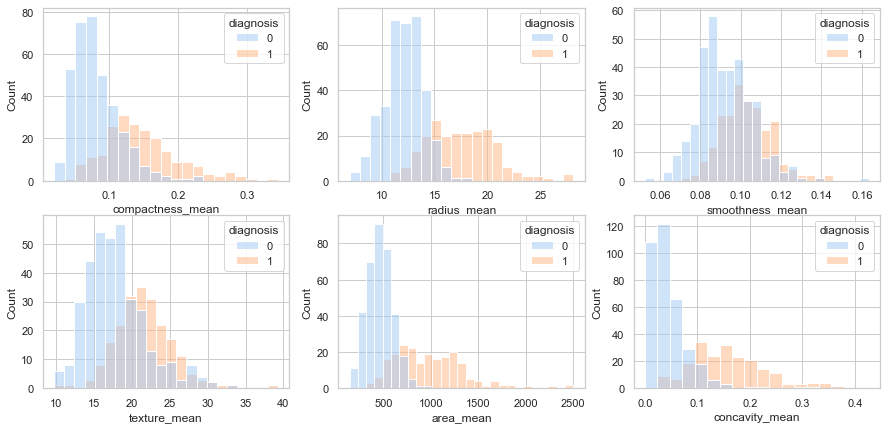

In [101]:
 import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(15, 7))    
    
sns.histplot(data=BC_dataset,
             x="radius_mean", kde=False,
             palette="pastel", hue="diagnosis",
             element="bars", legend=True, ax=axs[0, 1])

sns.histplot(data=BC_dataset,
             x="texture_mean", kde=False,
             palette="pastel", hue="diagnosis",
             element="bars", legend=True, ax=axs[1, 0])

sns.histplot(data=BC_dataset,
             x="area_mean", kde=False,
             palette="pastel", hue="diagnosis",
             element="bars", legend=True, ax=axs[1, 1])

sns.histplot(data=BC_dataset,
             x="smoothness_mean", kde=False,
             palette="pastel", hue="diagnosis",
             element="bars", legend=True, ax=axs[0, 2])

sns.histplot(data=BC_dataset,
             x="compactness_mean", kde=False,
             palette="pastel", hue="diagnosis",
             element="bars", legend=True, ax=axs[0, 0])

sns.histplot(data=BC_dataset,
             x="concavity_mean", kde=False,
             palette="pastel", hue="diagnosis",
             element="bars", legend=True, ax=axs[1, 2])

plt.show()

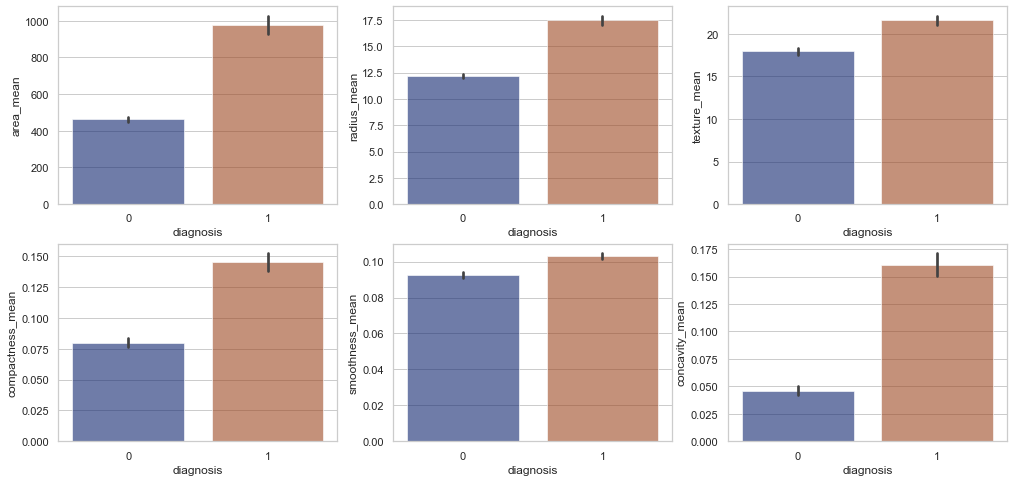

In [102]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 3, figsize=(17, 8))    

# Draw a nested barplot by species and sex
sns.barplot(
    data=BC_dataset,
    x="diagnosis", y="radius_mean", palette="dark", alpha=.6, ax=axs[0, 1])

sns.barplot(
    data=BC_dataset,
    x="diagnosis", y="compactness_mean", palette="dark", alpha=.6, ax=axs[1, 0])

sns.barplot(
    data=BC_dataset,
    x="diagnosis", y="smoothness_mean", palette="dark", alpha=.6, ax=axs[1, 1])

sns.barplot(
    data=BC_dataset,
    x="diagnosis", y="texture_mean", palette="dark", alpha=.6, ax=axs[0, 2])

sns.barplot(
    data=BC_dataset,
    x="diagnosis", y="area_mean", palette="dark", alpha=.6, ax=axs[0, 0])

sns.barplot(
    data=BC_dataset,
    x="diagnosis", y="concavity_mean", palette="dark", alpha=.6, ax=axs[1, 2])
plt.show()

<AxesSubplot:>

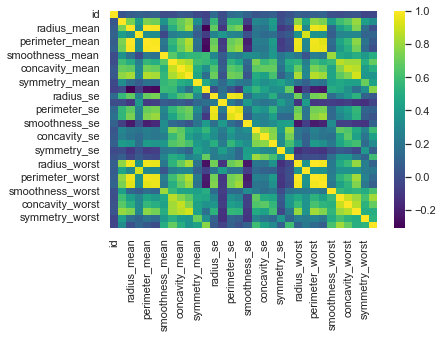

In [110]:
sns.heatmap(BC_dataset.corr(), annot = False, cmap = 'viridis')

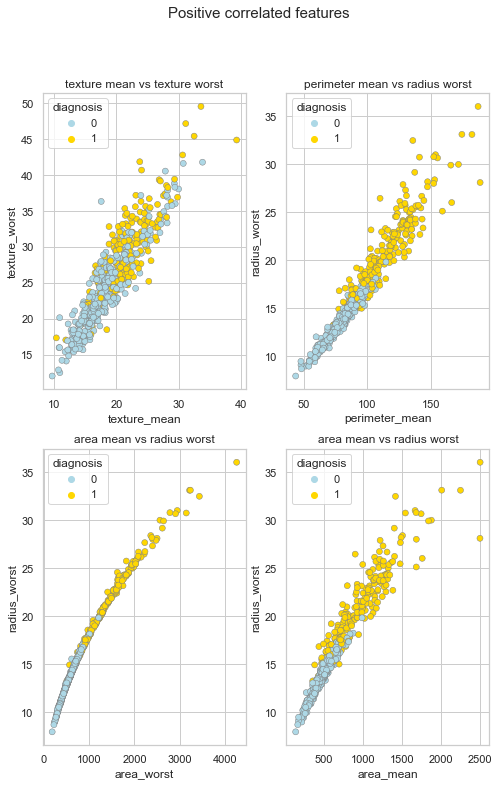

In [124]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

fig, axs = plt.subplots(2, 2, figsize=(8, 12))   

plt.subplot(224)
sns.scatterplot(x = BC_dataset['area_mean'], y = BC_dataset['radius_worst'], hue = "diagnosis",
                    data = BC_dataset, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

plt.subplot(222)
sns.scatterplot(x = BC_dataset['perimeter_mean'], y = BC_dataset['radius_worst'], hue = "diagnosis",
                    data = BC_dataset, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(221)
sns.scatterplot(x = BC_dataset['texture_mean'], y = BC_dataset['texture_worst'], hue = "diagnosis",
                    data = BC_dataset, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(223)
sns.scatterplot(x = BC_dataset['area_worst'], y = BC_dataset['radius_worst'], hue = "diagnosis",
                    data = BC_dataset, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 15)
plt.show()